## Building Random Quantum Circuits, with and without Noise, to Analyse Measurement Outcome Fidelity

**Authors:** Pranavi Jain, Dr Marcin Abram

**Affiliation:** University of Southern California

**Configure Qiskit Runtime Service**

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum", token="%your-API-token%", set_as_default=True, overwrite=True
)

# Load saved credentials
service = QiskitRuntimeService()

**Generate a Random Circuit for Given Parameters**
<br>
- Args:
    * noq - number of qubits
    * depth - depth of qauntum circuit
    * gate_set - dict of specified set of gates

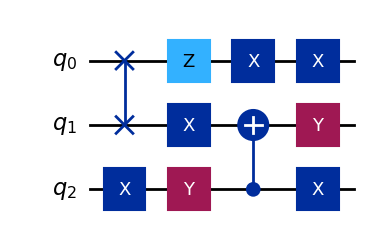

In [1]:
from random_circuit import eagle_gate_set, basis_gate_set
from random_circuit import get_random_circuit

## Main Function -- 1) Calling Random Circuit Generator
noq = 3
depth = 4
gate_set = basis_gate_set

circuit = get_random_circuit(noq, depth, gate_set)
circuit.draw("mpl")

**Add arbitrary Noise to Circuit generated above**

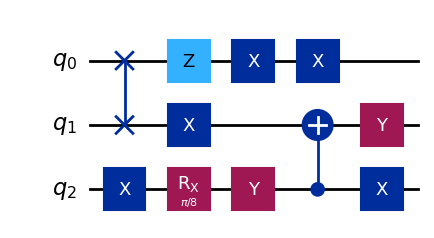

In [4]:
from qiskit.circuit.library import standard_gates
from utils import modify_circuit
import numpy as np


## Main Function cntd -- 2) Adding Noise to a copy of the Circuit

qubit = [2]
pos = 2
gate = standard_gates.RXGate(np.pi / 8)  # Specify noise

noisyCirc = modify_circuit(qubit, gate, pos, circuit)
noisyCirc.draw("mpl")

**Measure the two Circuits (with and without noise) in 3 Different Basis - X, Y, Z**
<br>
The output for 'n' number of runs is stored as a list for each of the circuits

In [5]:
from qiskit.providers.basic_provider import BasicSimulator
from measure_circuit import get_circuit_output

## Main Function cntd -- 3) Performing Measurements on the Circuits
runs = 50
backend = BasicSimulator()
# backend = service.backend("ibmq_qasm_simulator")

meas1 = get_circuit_output(circuit, runs, backend)
meas2 = get_circuit_output(circuit, runs, backend)
noiseMeas = get_circuit_output(noisyCirc, runs, backend)

print("First 5 measurement outcomes for the random circuit:")
for i in range(0, 5):
    print(meas1[i])

print("\nFirst 5 measurement outcomes for the circuit WITH noise:")
for i in range(0, 5):
    print(noiseMeas[i])

First 5 measurement outcomes for the random circuit:
{'X': {'001': 143, '110': 121, '000': 128, '111': 129, '101': 152, '100': 119, '010': 119, '011': 113}, 'Y': {'011': 121, '000': 149, '010': 140, '110': 121, '111': 124, '100': 135, '101': 123, '001': 111}, 'Z': {'100': 1024}}
{'X': {'010': 120, '000': 137, '101': 131, '011': 146, '110': 125, '001': 128, '100': 112, '111': 125}, 'Y': {'000': 126, '100': 137, '101': 131, '001': 112, '011': 138, '010': 119, '110': 147, '111': 114}, 'Z': {'100': 1024}}
{'X': {'000': 139, '011': 120, '001': 143, '100': 123, '101': 125, '110': 107, '111': 118, '010': 149}, 'Y': {'101': 150, '111': 123, '000': 137, '100': 134, '001': 122, '011': 118, '110': 117, '010': 123}, 'Z': {'100': 1024}}
{'X': {'000': 127, '001': 124, '110': 113, '111': 127, '100': 126, '101': 123, '011': 143, '010': 141}, 'Y': {'010': 133, '111': 117, '000': 109, '110': 153, '001': 118, '100': 136, '011': 128, '101': 130}, 'Z': {'100': 1024}}
{'X': {'001': 123, '100': 119, '101': 1

**Compute Fidelities between - (i) Circuit with itself, and (ii) Circuit with Noisy circuit**

Circuit fidelities - [0.9967194936689361, 10.974499961797013, 20.9493327538798, 30.932279804738997, 40.911600701459754, 50.88854994621789, 60.858559346952035, 70.83247932953805, 80.80230038670454, 90.77903214998639, 100.75548692417159, 110.74313532787811, 120.71626595363713, 130.69568778704362, 140.66819731895916]
Noisy circuit - [0.9947808518564718, 10.866575241089297, 20.70315641052076, 30.566244751430887, 40.42819866090962, 50.26817269776319, 60.12931746693281, 70.0123417452273, 79.83552317547088, 89.7148567614651, 99.58227945849278, 109.39559454085186, 119.24253517808634, 129.11004473302708, 138.9206148134732]


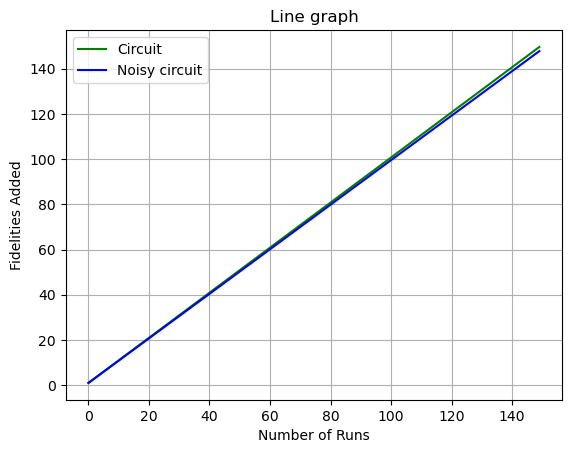

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from utils import get_fidelity_data

## Main Function cntd -- 4) Computing Fidelity between:
#   - circOp1 & circOp2
#   - circOp1 & noiseCircOutput

fidelities = get_fidelity_data(meas1, meas2, noiseMeas)
circF = fidelities.get("C2C")
noisyF = fidelities.get("C2N")
print("Circuit fidelities - " + str(circF[::20]))
print("Noisy circuit - " + str(noisyF[::20]))

# plotting fidelities vs number of runs
x = np.arange(0, len(circF))
plt.title("Line graph")
plt.xlabel("Number of Runs")
plt.ylabel("Fidelities Added")
plt.plot(x, circF, color="green", label='Circuit')
plt.plot(x, noisyF, color="blue", label='Noisy circuit')
plt.grid()
plt.legend()
plt.show()